Import & Load

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')


Data Summary

In [3]:
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observation:

891 rows × 12 columns 

Missing: Cabin (687), Age (177), Embarked (2)

Avg Age ≈ 29, Avg Fare ≈ 32, Most passengers in Pclass 3.

Univariate Visualizations

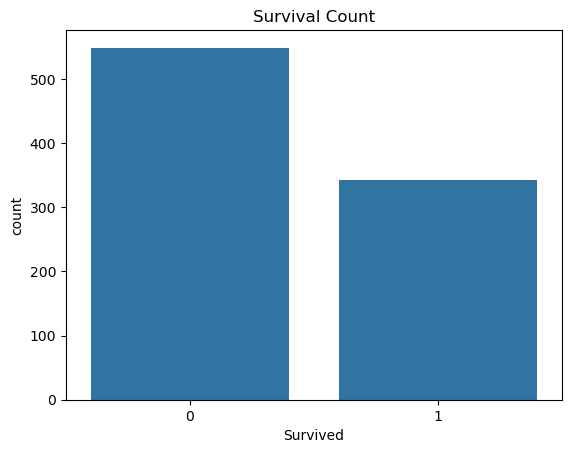

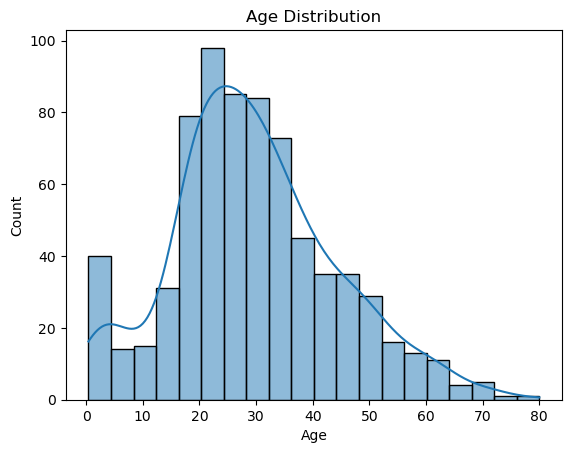

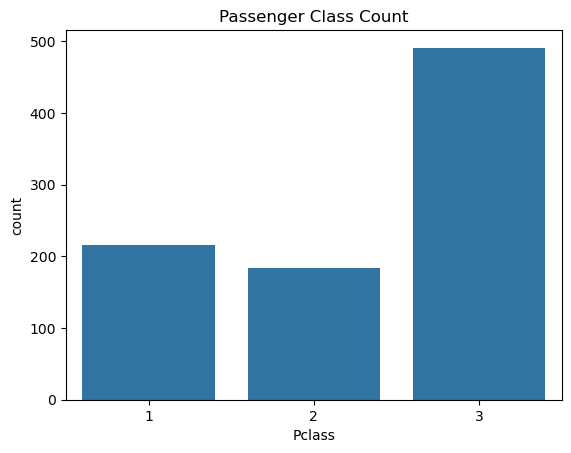

In [4]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Count')
plt.show()


Observation:

More deaths than survivals.

Most passengers 20–40 years old.

Most passengers in 3rd class.

Bivariate Visualizations

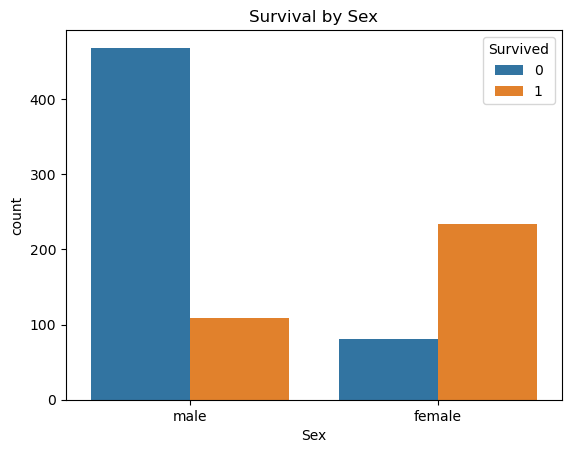

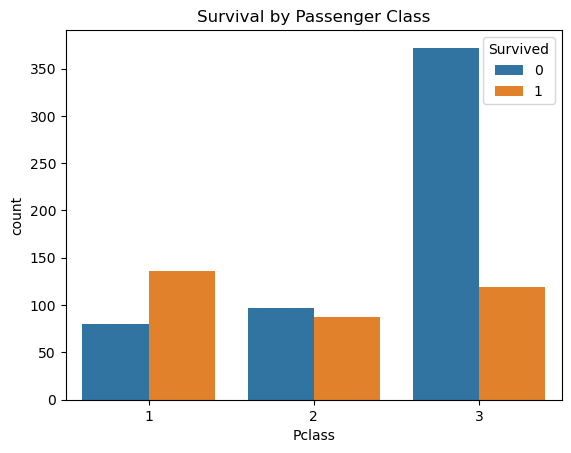

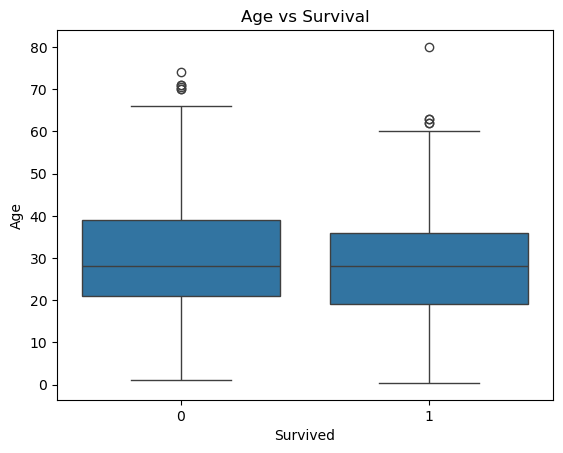

In [5]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()


Observation:

Females survived more than males.

First-class passengers had better survival rates.

Younger passengers survived more.

Missing Value Handling


In [10]:
df.fillna({'Age': df['Age'].median(),
           'Embarked': df['Embarked'].mode()[0]}, inplace=True)



Correlation Heatmap



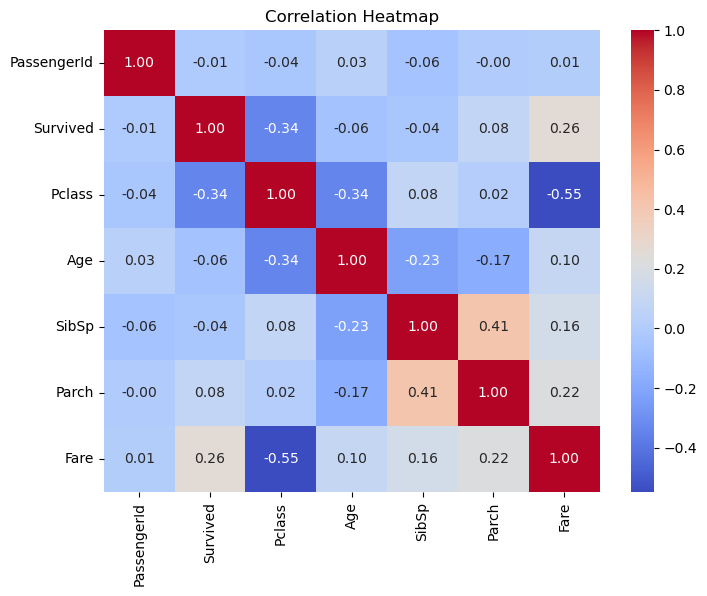

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Observation:

Pclass shows a strong negative correlation with Survived (passengers in higher classes — 1st class — had better survival chances than those in 3rd class).

Fare has a positive correlation with Survived (higher ticket prices were linked to higher survival rates).

SibSp (siblings/spouses aboard) and Parch (parents/children aboard) show weak correlations with survival, meaning family size had only a small impact.

Age has a slight negative correlation with survival (younger passengers survived slightly more often).


Final Conclusion:
1. Females had a much higher survival rate than males.
2. Passengers in 1st class had better chances of survival compared to 2nd and 3rd classes.
3. Higher fares were associated with higher survival chances.
4. Younger passengers had a slightly better survival rate than older ones.
5. Missing values in Age and Embarked were handled; Cabin was dropped due to excessive missing data.

